<h1><center> TP 1 OPTIMISATION </center></h1>

## 1-Importation de bibliothéques

In [15]:
import matplotlib.pyplot as plt
import numpy as np

## 2-Définir la fonction , le gradient et la matrice hessiene

In [16]:
#La fonction à optisimer :

def df(x,y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2


#Le gradient de la fonction à optimiser

def Grad_df(x,y, a=1, b=100):
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

#La matrice hessiene

def Hessian_df(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])




## 3- Gradient à PAS FIXE

In [86]:
def Gradient_PAS(Grad,x,y, theta =0.001, ep=1e-5,max_iterations = 100000):
    i = 0
    valeurs_x=np.empty(0)
    valeurs_y=np.empty(0)
    nbr_iterations = np.empty(0)
    X = np.array([x,y])
    
    while np.linalg.norm(Grad(x,y)) > ep and i < max_iterations:
        i +=1
        valeurs_x = np.append(valeurs_x,x)
        valeurs_y = np.append(valeurs_y,y)
        nbr_iterations = np.append(nbr_iterations ,i)           
        X = X - theta * Grad(x,y)
        x,y = X[0], X[1]     
    return X,valeurs_x,valeurs_y, nbr_iterations



In [87]:
x_0=-1
y_0=1
X,valeurs_x,valeurs_y, nbr_iterations = Gradient_PAS(Grad_df,x_0,y_0)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.99998882 0.9999776 ] itérations 26271


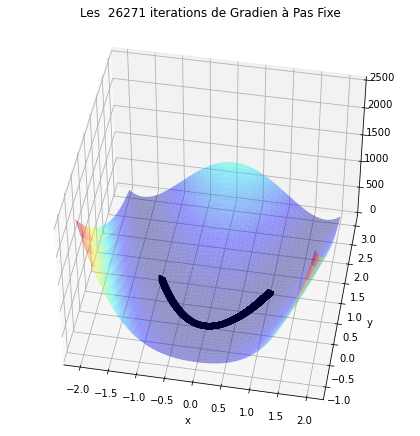

In [88]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = df(X, Y)

anglesx = valeurs_x[1:] - valeurs_x[:-1]
anglesy = valeurs_y[1:] - valeurs_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(valeurs_x,valeurs_y, df(valeurs_x,valeurs_y),color = 'black', marker = '>', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Les  {} iterations de Gradien à Pas Fixe'.format(compteur))

plt.show()

In [89]:
X,valeurs_x,valeurs_y, nbr_iterations = Gradient_PAS(Grad_df,x_0,y_0,0.00001)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.36342452 0.12904409] itérations 100000


In [90]:
X,valeurs_x,valeurs_y, nbr_iterations = Gradient_PAS(Grad_df,x_0,y_0,0.00005)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.93978294 0.88294215] itérations 100000


In [91]:
X,valeurs_x,valeurs_y, nbr_iterations = Gradient_PAS(Grad_df,x_0,y_0,0.001)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.99998882 0.9999776 ] itérations 26271


Pour l'algoithme de gradient à pas fixe on a mis un double critére d'arret , lorsque la norme de gradient est inférieure à notre tolérance epsilon qui est fixé 1e-5 , ainsi une deuxiéme critétere d'arrét c'est la nombre d'itération maximal qui fixé afin d'éviter les boucle infinis. lorsque on excute le programme avec valeur initiale fixe -1 pour x et 1 pour y mais en changeant theta on a trouvé :
<br>
<br>
- pour theta =0.00001 , la fonction ne converge pas (x*: [0.36342452 0.12904409]) meme avec le nombre d'ieration maximal
<br>
<br>
- pour theta =0.00005 , la fonction ne converge pas  (x*: [0.93978294 0.88294215] ) meme avec le nombre d'ieration maximal
<br>
<br>
- pour theta =0.001 , la fonction converge   (x*: [0.99998882 0.9999776 ] ) à partir de l'itération 26271
<br>
<br>

Cela nous permet de déduire que pour avoir précision plus fine en utilisant la méthode de gradien à pas fixe il faut beaucoup d'itération ainsi il faut bien choisir le paramétre thetha puisque il  a une grande influence pour trouver le minimum.

## 4- Polyak

In [17]:
def Polyak(Grad, x, y, theta=0.0103,k=1.0125, ep=1e-5, max_iterations=100000):
    i=0
    valeurs_x=np.empty(0)
    valeurs_y=np.empty(0)
    nbr_iterations = np.empty(0)
    X = np.array([x,y])

    while np.linalg.norm(Grad(x,y)) > ep and i < max_iterations:
        i +=1
        valeurs_x = np.append(valeurs_x,x)
        valeurs_y = np.append(valeurs_y,y)
        nbr_iterations = np.append(nbr_iterations ,i)   
        X = X - theta * Grad(x,y)
        theta=theta/k
        k=k+1
        x,y = X[0], X[1]

    return X,valeurs_x,valeurs_y, nbr_iterations

In [18]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.97453587 1.07872228] itérations 100000


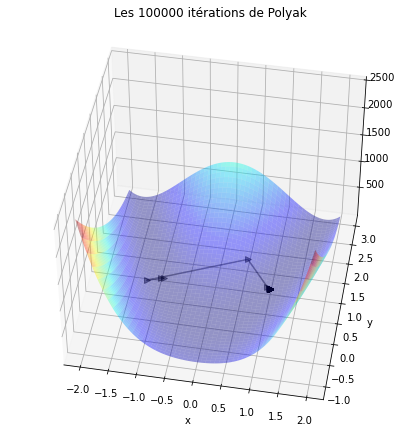

In [19]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = df(X, Y)

anglesx = valeurs_x[1:] - valeurs_x[:-1]
anglesy = valeurs_y[1:] - valeurs_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(valeurs_x,valeurs_y, df(valeurs_x,valeurs_y),color = 'black', marker = '>', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Les {} itérations de Polyak'.format(compteur))

plt.show()

In [20]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.001,k=1.0125)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [-0.9946322   0.99729628] itérations 100000


In [16]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.01,k=1.0125)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.71064229 0.96899385] itérations 100000


In [75]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.0103,k=1.0125)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.97453587 1.07872228] itérations 100000


In [21]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.0103,k=1)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [1.04971281 1.12323235] itérations 100000


In [22]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.0103,k=2)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [-0.91527899  0.99086061] itérations 100000


In [24]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations  = Polyak(Grad_df,x_0,y_0,theta=0.0103,k=10)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [-0.98663743  0.98317328] itérations 100000



Pour l'algoithme de Polyak on a mis un double critére d'arret , lorsque la norme de gradient est inférieure à notre tolérance epsilon qui est fixé 1e-5 , ainsi une deuxiéme critétere d'arrét c'est la nombre d'itération maximal qui fixé afin d'éviter les boucle infinis. lorsque on excute le programme avec valeur initiale fixe -1 pour x et 1 pour y.
<br><br>
En changeant theta et en gardant k initiale fixe (k=1.0125) on a trouvé :
<br><br>
-pour theta =0.001 , la fonction ne converge pas (x*: [-0.9946322   0.99729628]) meme avec le nombre d'ieration maximal
<br>
-pour theta =0.01 , la fonction ne converge pas  (x*: [0.71064229 0.96899385]  ) meme avec le nombre d'ieration maximal
<br>
-pour theta=0.02,la fonction ne se converge pas complétement mais se rapproche de minimum (x*: [0.97453587 1.07872228] ).
<br><br><br>
Aprés en changeant k initiale et en gardant theta fixe (theta=0.0103) on a trouvé :
<br><br>
-pour k=1 , la fonction ne converge pas  (x*: [1.04971281 1.12323235]  ) meme avec le nombre d'ieration maximal
<br>
-pour k =2, la fonction ne converge pas (x*: [-0.91527899  0.99086061] ) meme avec le nombre d'ieration maximal
<br>
-pour k =10 la fonction ne se converge pas meme avec le nombre d'ieration maximal (x*: [-0.98663743  0.98317328] ).
<br><br>
Cela nous permet de déduire que pour avoir précision plus fine en utilisant la méthode de Polyak il faut beaucoup d'itération ainsi il faut bien choisir le paramétre thetha  et la valeur initiale de kpuisque il  ont une grande influence pour trouver le minimum.

## 4- SHOR

In [5]:
def SHOR(Grad, x, y,alpha=0.999999999,theta=0.001, ep=1e-5, max_iterations=100000):
    
    X = np.array([x,y])
    k=0
    i=0
    valeurs_x=np.empty(0)
    valeurs_y=np.empty(0)
    nbr_iterations = np.empty(0)

    while np.linalg.norm(Grad(x,y)) > ep and i < max_iterations:
        i +=1
        valeurs_x = np.append(valeurs_x,x)
        valeurs_y = np.append(valeurs_y,y)
        nbr_iterations = np.append(nbr_iterations ,i) 
        X = X - theta * Grad(x,y)
        theta=theta*(alpha**k)
        k=k+1
        x,y = X[0], X[1] 

    return X,valeurs_x,valeurs_y, nbr_iterations

In [6]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)


x*: [0.99998882 0.9999776 ] itérations 30352


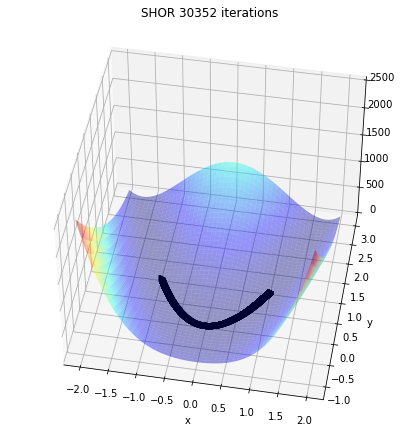

In [8]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = df(X, Y)

anglesx = valeurs_x[1:] - valeurs_x[:-1]
anglesy = valeurs_y[1:] - valeurs_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(valeurs_x,valeurs_y, df(valeurs_x,valeurs_y),color = 'black', marker = '>', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('SHOR {} iterations'.format(compteur))

plt.show()

In [30]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0,alpha=0.1)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [-1.00268474  0.98414127] itérations 100000


In [31]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0,alpha=0.5)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [-0.98232891  0.99046801] itérations 100000


In [33]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0,theta=0.0001)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [0.90344016 0.81579479] itérations 100000


In [38]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0,theta=0.00005)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [0.72403544 0.52293542] itérations 100000


In [39]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = SHOR(Grad_df,x_0,y_0,theta=0.001)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [0.99998882 0.9999776 ] itérations 30352


Pour l'algoithme de Shor on a mis un double critére d'arret , lorsque la norme de gradient est inférieure à notre tolérance epsilon qui est fixé 1e-5 , ainsi une deuxiéme critétere d'arrét c'est la nombre d'itération maximal qui fixé afin d'éviter les boucle infinis. lorsque on excute le programme avec valeur initiale fixe -1 pour x et 1 pour y.
<br><br>
En changeant alpha et en gardant theta fixe(theta=0.0034) on a trouvé :
<br><br>
-pour alpha =0.1 , la fonction ne converge pas (x*: [-1.00268474  0.98414127]) meme avec le nombre d'ieration maximal
<br>
-pour aplha =0.5 , la fonction ne converge pas  (x*: [-0.98232891  0.99046801]  ) meme avec le nombre d'ieration maximal
<br>
-pour alpha =0.999999999 , la fonction  se converge à partir de l'itération numéro 42622  (x*: [0.99998882 0.9999776 ]).
<br><br><br>
Aprés en changeant theta  et en gardant alpha fixe (alpha=0.999999999) on a trouvé :
<br><br>
-pour theta=0.00005 , la fonction ne converge pas  (x*: [0.72403544 0.52293542]   ) meme avec le nombre d'ieration maximal
<br>
-pour theta=0.0001 , la fonction ne converge pas complétement (x*: [0.90344016 0.81579479]) meme avec le nombre d'ieration maximal
<br>
-pour theta=0.001 , la fonctionse converge pas complétement vers minimum (x*: [0.99998882 0.9999776 ]) à partir de 30352 itérations.
<br><br>

Cela nous permet de déduire que pour avoir précision plus fine en utilisant la méthode de Schor il faut beaucoup d'itération ainsi il faut bien choisir le paramétre thetha  et alpha.Ces paramétres  ont une grande influence pour trouver le minimum.

## 5- Section dorré

In [10]:
def section_dorre(f, a0, b0, epsilon = 1e-8 ):
    alpha =  (np.sqrt(5) - 1) / 2
    a = a0
    b=b0
    c = alpha*a + (1-alpha)*b
    d = a + b - c
    
    while (b-a) > 2 * epsilon:
        if (f(c) < f(d)) :
            b = d
            d = c
            c = a+b-d
        else:
            a = c
            c = d
            d = a +b-c
    return (a + b) / 2

In [11]:
def pas_optimal_dorre(F, F_grad, x,y, epsilon=1e-10, max_iterations=100):

    X = np.array([x,y])
    i=0
    valeurs_x=np.empty(0)
    valeurs_y=np.empty(0)
    nbr_iterations = np.empty(0)
    for i in range(max_iterations):
        valeurs_x = np.append(valeurs_x,x)
        valeurs_y = np.append(valeurs_y,y)
        nbr_iterations = np.append(nbr_iterations ,i)  

        
        q = lambda teta: F((X - teta * F_grad(x,y))[0],(X - teta * F_grad(x,y))[1])
        
        teta = section_dorre(q, 0, 1)
        
        X = X - teta * F_grad(x,y)
        
        x,y = X[0], X[1]

        
        if np.linalg.norm(F_grad(x,y)) < epsilon:
            return X,valeurs_x,valeurs_y, nbr_iterations
    return X,valeurs_x,valeurs_y, nbr_iterations


In [12]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = pas_optimal_dorre(df,Grad_df,x_0,y_0)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [1. 1.] itérations 30


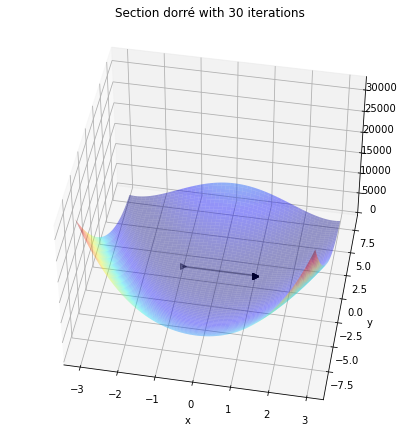

In [14]:
x = np.linspace(-3,3,250)
y = np.linspace(-9,8,350)
X, Y = np.meshgrid(x, y)
Z = df(X, Y)

%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(valeurs_x,valeurs_y, df(valeurs_x,valeurs_y),color = 'black', marker = '>', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Section dorré with {} iterations'.format(compteur))

plt.show()


Remarque :
<br>
L'algorithme de section dorée se converge complétement et de maniére rapide juste avec 30 itérations.

## 6- Newton

In [96]:
def Newton(Grad, Hessian_df, x,y, epsilon=1e-5, max_iterations =100000):
    
    i = 0
    X = np.array([x,y])
    valeurs_x=np.empty(0)
    valeurs_y=np.empty(0)
    nbr_iterations = np.empty(0)
    
    while np.linalg.norm(Grad(x,y)) > epsilon and i < max_iterations:
        i +=1
        valeurs_x = np.append(valeurs_x,x)
        valeurs_y = np.append(valeurs_y,y)
        nbr_iterations = np.append(nbr_iterations ,i)   
        X = X - np.linalg.inv(Hessian_df(x,y)) @ Grad(x,y)
        x,y = X[0], X[1]
          
    return X,valeurs_x,valeurs_y, nbr_iterations


In [97]:
x_0 = -1
y_0 = 1
X,valeurs_x,valeurs_y, nbr_iterations = Newton(Grad_df,Hessian_df,x_0,y_0)
compteur=len(nbr_iterations)
print("x*:",X , "itérations" , compteur)

x*: [1. 1.] itérations 2


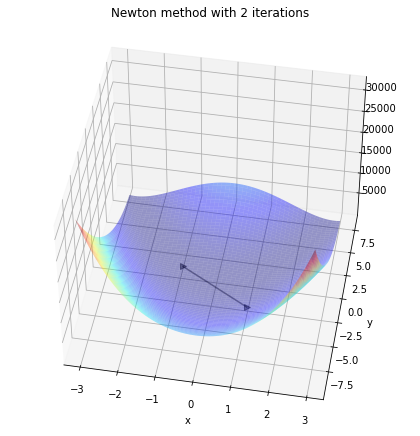

In [98]:
x = np.linspace(-3,3,250)
y = np.linspace(-9,8,350)
X, Y = np.meshgrid(x, y)
Z = df(X, Y)


anglesx = valeurs_x[1:] - valeurs_x[:-1]
anglesy = valeurs_y[1:] - valeurs_y[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(valeurs_x,valeurs_y, df(valeurs_x,valeurs_y),color = 'black', marker = '>', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Newton method with {} iterations'.format(compteur))

plt.show()


L'algorithmes  de  Newton  est trop rapide ,il nécessite 2 itérations afin de converger vers le minimum mais pour le gradient à pax fixe avec 26271 iteratons il ne converge pas complétement.Mais on peut changer et amélioerer le gradient à pas fixe pour travailler avec gradient à pas optimal et là on a utilisé la section dorée qu'il nécessite moins d'itétation à faire par rapport la méthode de gradient à pas fixe puisque cette algorithmes évite de récalculer le pas à chaque itération.
<br><br>
Pour cela , on a touvé avec l'algorithme de section dorée juste la nécessité de 30 itération pour converger vers le minimum.
<br><br>
Comme conclusion , les deux meilleurs algroithmes pour converger vers le minimum rapidement c'est l'algorithme de newton et Section dorée.